# Here is where you tell Python what Object you will be using and working with, adopted from Julien's code

In [1]:
 import sys, shutil

In [2]:
from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.old.BaseClasses import ExperimentalData1D

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load Data

In [3]:
pwd #i have a folder in scattersim-examples called data_ye which has a simple_cubic intensity pattern

'C:\\Users\\Aaron-Crucial-2016\\documents\\Python Scripts\\py33\\software\\scattersim-examples'

In [4]:
data_dir = './data_ye/'
data_file = 'simple_cubic_2.txt'

res = np.loadtxt(data_dir+data_file,  skiprows=1, comments="#")


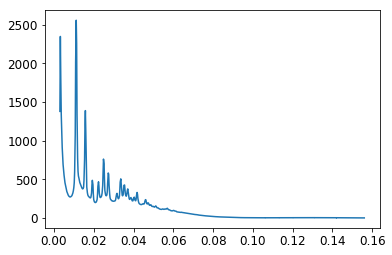

In [5]:
plt.plot(res[:,0],res[:,1])

In [6]:
ptype = 'Intensity'
area_of_interest = [0.0,1.2,0,2.5] #something you probably need to play around with

plot_data = True

#To figure out what to write here, keep the data in a folder in the same place as where you save this workbook and copy
#the folder name (if nested) into the data_Dir and the file name is the .txt or .csv file with only the rows of interest, i.e. q and Intensity

data_dir = './data_ye/'
data_file = 'simple_cubic_2.txt'

"""d = ExperimentalData1D()
d.load_intensity_txt( data_dir+data_file, skiprows=1, subtract_minimum=True )
d.set_structure_factor_asymptote( 0.75, 0.82 )

g= d.plot(scaling=[0.0,0.75,1e2,5e3],xlog=True, ylog=True)
#[0.0,1.4,5e-6,5e-5]
"""

'd = ExperimentalData1D()\nd.load_intensity_txt( data_dir+data_file, skiprows=1, subtract_minimum=True )\nd.set_structure_factor_asymptote( 0.75, 0.82 )\n\ng= d.plot(scaling=[0.0,0.75,1e2,5e3],xlog=True, ylog=True)\n#[0.0,1.4,5e-6,5e-5]\n'

In [7]:
#removes tail in the code version
plt_save = False
def exp_data_plot():
    plt.figure('exp data', figsize=(7,5))    
    #plt.clf()
    q_list =res[:,0]
    int_list = res[:,1]
    plt.semilogy( q_list, int_list, color=(0,0,0), linewidth=2.0, )
    plt.xlabel( r'$q \, (\mathrm{nm}^{-1})$', size=20 )
    plt.ylabel( 'Intensity (a.u.)', size=20 )   
    if plt_save == True:
        plt.savefig('experimental data', bbox_inches=None, pad_inches=0.1)


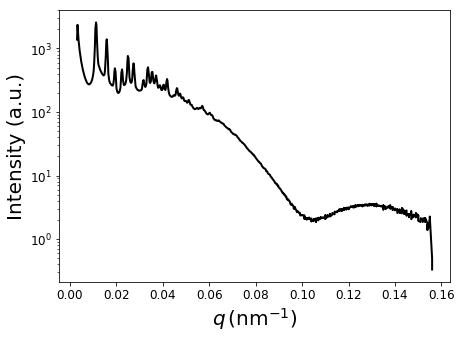

In [8]:
exp_data_plot()

In [9]:
q_list = res[:,0]
int_list = res[:,1]
q = np.linspace(0.032, 1.56, len(q_list))
peak = PeakShape(delta=0.01, nu=0.01) 
lattice_spacing = 55.

pargs_sphere = {'radius' : 9.0}
sphere = SphereNanoObject(pargs_sphere)


sq_sphere= sphere.form_factor_squared_isotropic(q)

In [10]:
%time lat_SC = SimpleCubic([sphere], lattice_spacing_a=lattice_spacing)
%time Iq_SC = lat_SC.intensity(q, peak)
%time Sq_SC = lat_SC.structure_factor_isotropic(q, peak)
print("Finished calculating Simple Cubic")

Wall time: 0 ns
Wall time: 1.44 s
Wall time: 1.48 s
Finished calculating Simple Cubic


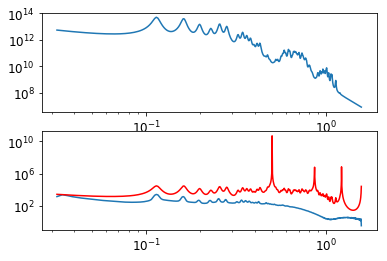

In [11]:
plt.figure(2);
plt.clf()
plt.title("Simple Cubic Intensity")
plt.subplot(2,1,1)
plt.loglog(q, Iq_SC)

plt.subplot(2,1,2)
plt.loglog(q,int_list)
plt.loglog(q,Sq_SC,'red')

## Fitting the Data with the Code

## Polydisperse Simple Cubic Lattice, here we make the same lattice but build in polydispersity to the object

In [12]:
sigma_D = .06

pargs_polysphere = dict(radius= 7, sigma_R=.05)

polysphere = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')

sq_polysphere = polysphere.form_factor_squared_isotropic(q)

lat_SC_poly = SimpleCubic([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
Iq_SC_poly = lat_SC_poly.intensity(q, peak)
Sq_SC_poly = lat_SC_poly.structure_factor_isotropic(q, peak)
print("Finished calculating Simple Cubic polysphere")



Finished calculating Simple Cubic polysphere


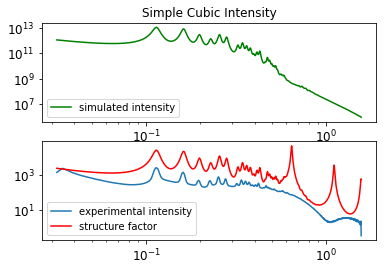

In [13]:
plt.figure(3);
plt.clf()

plt.subplot(2,1,1)
plt.title("Simple Cubic Intensity")
plt.loglog(q, Iq_SC_poly, 'green', label='simulated intensity')
plt.legend(loc='lower left')

plt.subplot(2,1,2)
plt.loglog(q,int_list, label='experimental intensity')
plt.loglog(q,Sq_SC_poly,'red', label='structure factor')
plt.legend(loc='lower left')

## Reports and Summary Data  NOT ACTIVE YET

In [14]:

send_pdf_code = False
exp_name = 'test'
if send_pdf_code == True:
    if exp_name =='replace name here':
        print('you need to put a uniqe name')
    else:
        %%bash ipython nbconvert --to=pdf '%s' % 'Simple_cubic_from_Ye_'+exp_name+'.ipynb'

        
#report lab 
# make a latex type document

In [15]:
x = 'potato'
print ('%s' % x) 

potato


In [16]:
'%s' % 'Simple_cubic_from_Ye_'+exp_name+'.ipynb'


'Simple_cubic_from_Ye_test.ipynb'

In [17]:
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.basinhopping.html